# Linear, Ridge and Lasso Regression

The boston housing data was removed from sklearn and hence, need to import it indirectly

In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [2]:
# List of column names (Boston dataset has 13 features + 1 target column)
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 
    'PTRATIO', 'B', 'LSTAT', 'MEDV'  # MEDV is usually the target (house prices)
]

# Combine data and target into a DataFrame with column names
dataset = pd.DataFrame(data, columns=column_names[:-1])  # Use the feature column names
dataset['Price'] = target  # Add the target column (house prices)

# Display the DataFrame with headers
print(dataset.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [3]:
dataset.shape

(506, 14)

In [4]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [5]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

### STARTING WITH LINEAR REGRESSION

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
linear_reg = LinearRegression()
mse_linear = cross_val_score(linear_reg,X,y,cv = 5, scoring = 'neg_mean_squared_error')
print(mse_linear)

[-12.46030057 -26.04862111 -33.07413798 -80.76237112 -33.31360656]


In [7]:
np.mean(mse_linear)

-37.13180746769923

In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X,y, test_size=0.33, random_state = 33)

In [9]:
linear_reg.fit(X_train,y_train)

LinearRegression()

In [10]:
predictions = linear_reg.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predictions,y_test)
print(mse)

22.027772192633165


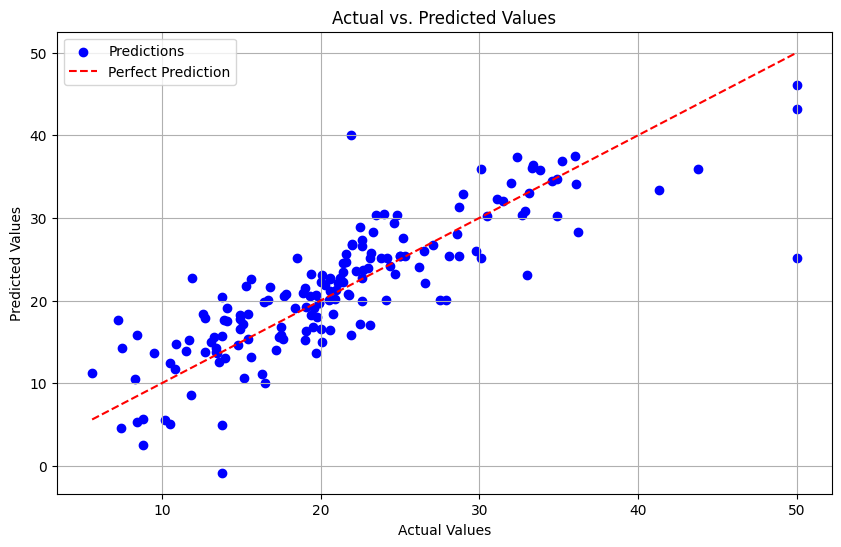

In [12]:
import matplotlib.pyplot as plt

# Assuming y_test are the actual values and predictions are the predicted values
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, predictions, color='blue', label='Predictions')

# Adding a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Adding labels and title
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show the legend
plt.legend()

# Show the plot
plt.grid()
plt.show()

### APPLYING RIDGE REGRESSION 

In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
params = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge, params,scoring = 'neg_mean_squared_error', cv=5)

In [14]:
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [15]:
best_alpha = ridge_regressor.best_params_
print(best_alpha)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-25.839760488384535


In [16]:
ridge_predictions = ridge_regressor.predict(X_test)

In [17]:
ridge_mse = mean_squared_error(ridge_predictions,y_test)
print(ridge_mse)

22.041342063951138


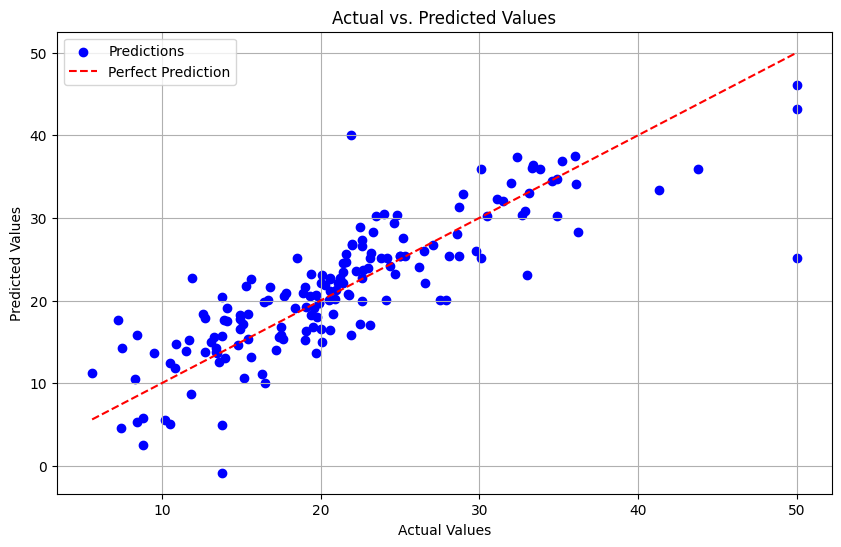

In [18]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, ridge_predictions, color='blue', label='Predictions')

# Adding a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Adding labels and title
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show the legend
plt.legend()

# Show the plot
plt.grid()
plt.show()

### APPLYING LASSO REGRESSION

In [19]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, params,scoring = 'neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train,y_train)

D:\Anaconda\envs\new_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.979e+03, tolerance: 2.370e+00
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\envs\new_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.903e+03, tolerance: 2.424e+00
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\envs\new_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.745e+03, toleranc

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [20]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-25.838741309713576


In [21]:
lasso_predictions = lasso_regressor.predict(X_test)
lasso_mse = mean_squared_error(lasso_predictions,y_test)
print(lasso_mse)

22.057705952542655


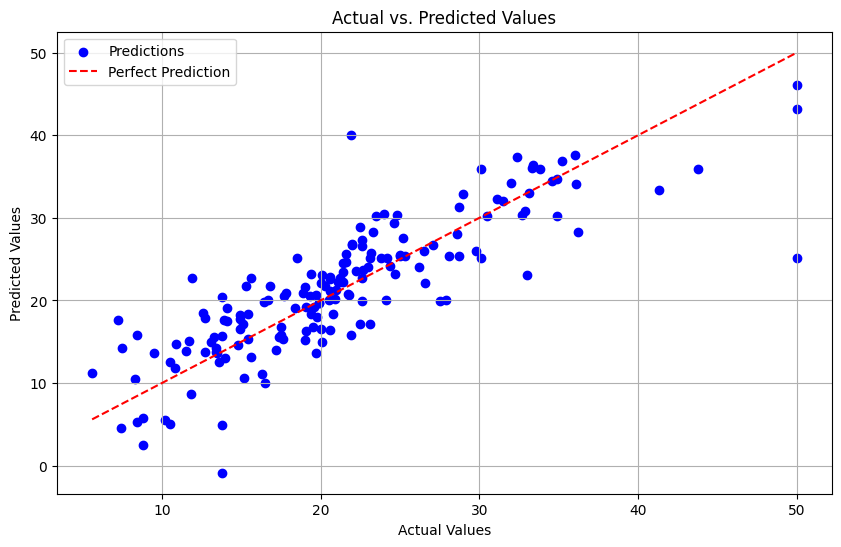

In [22]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, lasso_predictions, color='blue', label='Predictions')

# Adding a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Adding labels and title
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show the legend
plt.legend()

# Show the plot
plt.grid()
plt.show()

### IMPLEMENTING LOGISTIC REGRESSION 

Since Logistic Regression is used for Classification Tasks, we need a new dataset

In [27]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [39]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df["Target"] = dataset.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [40]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int32

In [43]:
y.value_counts() #CHECK FOR BALANCED / IMBALANCED DATA

1    357
0    212
Name: Target, dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 3)

381 188


In [48]:
params = {'C' : [0.1,1,5,10,15,20] , 'max_iter': [100,150]}

In [49]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic_regressor = GridSearchCV(logistic, params, cv=5,scoring='f1')

In [50]:
logistic_regressor.fit(X_train,y_train)

D:\Anaconda\envs\new_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\envs\new_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

D:\Anaconda\envs\new_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\envs\new_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

D:\Anaconda\envs\new_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\envs\new_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

D:\Anaconda\envs\new_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 5, 10, 15, 20], 'max_iter': [100, 150]},
             scoring='f1')

In [55]:
logistic_regressor.best_score_

0.9705103339868358

In [57]:
logistic_pred = logistic_regressor.predict(X_test)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,logistic_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.97      0.96      0.96       120

    accuracy                           0.95       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.95      0.95      0.95       188



In [65]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,logistic_pred)
print(conf_mat)

[[ 64   4]
 [  5 115]]


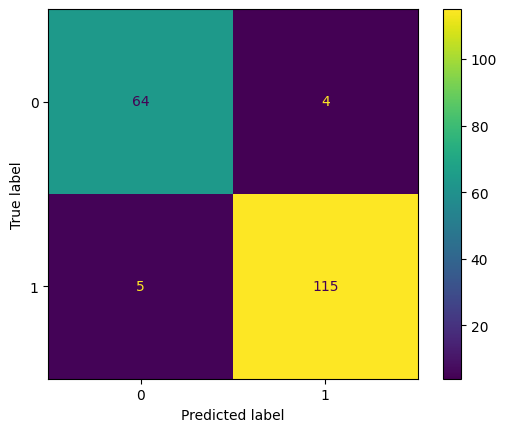

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
display = ConfusionMatrixDisplay(conf_mat)
display.plot()
plt.show()

In [71]:
print(accuracy_score(y_test, logistic_pred)*100,"% accuracy")

95.2127659574468 % accuracy
